<a href="https://colab.research.google.com/github/Dan-R-Sco/Dan-NLP/blob/master/sentiment_analysisGloVe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Get data

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip - ‘glove.6B.zip’ saved [862182613/862182613]

--2021-03-22 12:31:44--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2021-03-22 12:31:44--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2021-03-22 12:31:45--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [ ]:
!unzip glove*.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [ ]:
!ls
!pwd

glove.6B.100d.txt  glove.6B.300d.txt  glove.6B.zip
glove.6B.200d.txt  glove.6B.50d.txt   sample_data
/content


Load pre-trained word embeddings

In [ ]:
import numpy as np


print('Indexing word vectors.')

embeddings_index = {}
f = open('glove.6B.100d.txt', encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Indexing word vectors.
Found 400000 word vectors.


In [ ]:
embeddings_index['good']

array([-0.030769 ,  0.11993  ,  0.53909  , -0.43696  , -0.73937  ,
       -0.15345  ,  0.081126 , -0.38559  , -0.68797  , -0.41632  ,
       -0.13183  , -0.24922  ,  0.441    ,  0.085919 ,  0.20871  ,
       -0.063582 ,  0.062228 , -0.051234 , -0.13398  ,  1.1418   ,
        0.036526 ,  0.49029  , -0.24567  , -0.412    ,  0.12349  ,
        0.41336  , -0.48397  , -0.54243  , -0.27787  , -0.26015  ,
       -0.38485  ,  0.78656  ,  0.1023   , -0.20712  ,  0.40751  ,
        0.32026  , -0.51052  ,  0.48362  , -0.0099498, -0.38685  ,
        0.034975 , -0.167    ,  0.4237   , -0.54164  , -0.30323  ,
       -0.36983  ,  0.082836 , -0.52538  , -0.064531 , -1.398    ,
       -0.14873  , -0.35327  , -0.1118   ,  1.0912   ,  0.095864 ,
       -2.8129   ,  0.45238  ,  0.46213  ,  1.6012   , -0.20837  ,
       -0.27377  ,  0.71197  , -1.0754   , -0.046974 ,  0.67479  ,
       -0.065839 ,  0.75824  ,  0.39405  ,  0.15507  , -0.64719  ,
        0.32796  , -0.031748 ,  0.52899  , -0.43886  ,  0.6740

Load in data

In [ ]:
import pandas as pd

#upload dictionary file nad sentiment labels
phrases = pd.read_csv('dictionary.txt', delimiter = "|")
labels = pd.read_csv('sentiment_labels.txt', delimiter = '|')

phrases = phrases.sort_values(by='ID')

data = [phrases["review"], labels["sentiment values"]]
headers = ["review", "sentiment values"]
data = pd.concat(data,keys=headers,axis=1)
data.describe()

,sentiment values
count,239232.000000
mean,0.513001
std,0.175356
min,0.000000
25%,0.416670
50%,0.500000
75%,0.611110
max,1.000000


Clean the data - stemming, stopwords, punctuation

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords


#stemming
data['review'] = data['review'].apply(nltk.word_tokenize)

stop = stopwords.words('english')

#stemming, lowercase, stopword removal and punctuation
data['review'].apply(lambda x: [item for item in x if (word.isalpha() and (item not in stop))])

#stopword removal
#data['review'].apply(lambda x: [item for item in x if item not in stop])

#punctuation removal
#data['review'].apply(lambda x: [item for item in x if item.isalpha()])

#removal punctuation
#data['review'].apply(lambda x: [item for item in x if item not in stop])
#reviews_clean = [[word for word in line if (word.isalpha() and (not word in stpwords))] for line in reviews_clean]

0                                                       [!]
1                                                    [!, ']
2                                                   [!, '']
3                                                 [!, Alas]
4                                            [!, Brilliant]
                                ...                        
239227    [zoning, ordinances, protect, community, dulle...
239228                                          [zzzzzzzzz]
239229                                               [élan]
239230                                                  [É]
239231                [É, um, passatempo, descompromissado]
Name: review, Length: 239232, dtype: object

In [ ]:
data.head()

,review,sentiment values
0,[!],0.50000
1,"[!, ']",0.50000
2,"[!, '']",0.44444
3,"[!, Alas]",0.50000
4,"[!, Brilliant]",0.42708


In [ ]:
tokenizer = Tokenizer(num_words = 10000)
tokenizer.fit_on_texts(data['review'])
sequence = tokenizer.texts_to_sequences(data['review'])

index_of_words = tokenizer.word_index
print(len(index_of_words))


19789


In [ ]:
embed_num_dims = 100

embedding_matrix = np.zeros((len(index_of_words) + 1, embed_num_dims))

tokens = []
labels = []

for word,i in index_of_words.items():
    temp = embeddings_index.get(word)
    if temp is not None:
        embedding_matrix[i] = temp
        
#for plotting
        tokens.append(embedding_matrix[i])
        labels.append(word)

embedding_matrix.shape

(19790, 100)

(200, 2)


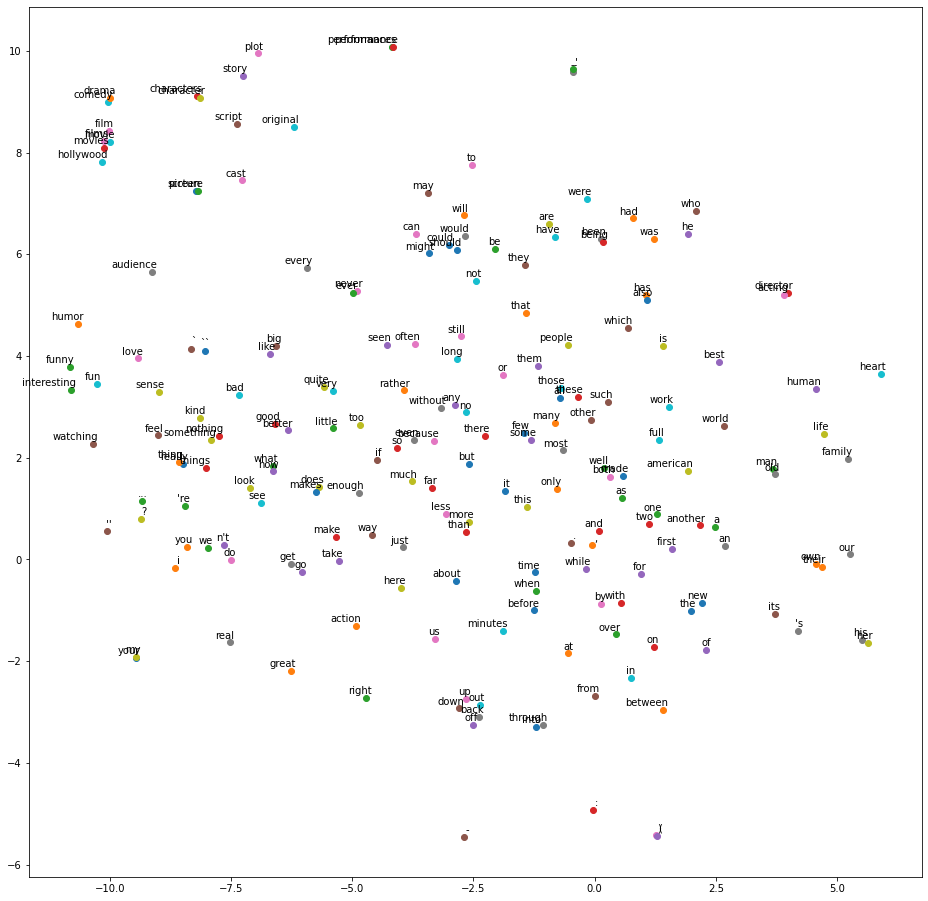

In [ ]:
#TSNE algorithm used to visualize word embeddings having huge amount (100) dimensions
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

def tsne():
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens[:200])
    print(new_values.shape)
    
    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16,16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

tsne()

**Predictive Modelling**

**Not working yet

In [ ]:
#convert values to groups

# create a list of conditions
conditions = [
    (data['sentiment values'] <= 0.2),
    (data['sentiment values'] > 0.2) & (data['sentiment values'] <= 0.4),
    (data['sentiment values'] > 0.4) & (data['sentiment values'] <= 0.6),
    (data['sentiment values'] > 0.6) & (data['sentiment values'] <= 0.8),
    (data['sentiment values'] > 0.8)
    ]

# create a list of the values we want to assign for each condition
values = ['Negative', 'Somewhat Negative', 'Netural', 'Somewhat Positive', 'Positive']

# create a new column and use np.select to assign values to it using our lists as arguments
data['sentiment values'] = np.select(conditions, values)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.review, data['sentiment values'], test_size=0.1, random_state=37)
print('# Train data samples:', X_train.shape[0])
print('# Test data samples:', X_test.shape[0])
assert X_train.shape[0] == y_train.shape[0]
assert X_test.shape[0] == y_test.shape[0]

# Train data samples: 215308
# Test data samples: 23924


In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import LabelEncoder

NB_WORDS = 10000  # Parameter indicating the number of words we'll put in the dictionary
tk = Tokenizer(num_words=NB_WORDS,
               filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
               lower=True,
               split=" ")
tk.fit_on_texts(X_train)

X_train_seq = tk.texts_to_sequences(X_train)
X_test_seq = tk.texts_to_sequences(X_test)

In [ ]:
#pad
maxlen = max([len(x) for x in X_train])
print(maxlen)

pad_type = 'post'
trunc_type = 'post'

X_train_seq_trunc = pad_sequences(X_train_seq, padding=pad_type, truncating=trunc_type, maxlen=maxlen)
X_test_seq_trunc = pad_sequences(X_test_seq, maxlen=maxlen)

56


In [ ]:
#example of padded
X_train_seq_trunc[10]  # Example of padded sequence

array([ 59, 136,   2, 151,  91,   7, 110,   2,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0], dtype=int32)

In [ ]:
#convert target class to numbers

le = LabelEncoder()
y_train_le = le.fit_transform(y_train)
y_test_le = le.transform(y_test)
y_train_oh = to_categorical(y_train_le)
y_test_oh = to_categorical(y_test_le)

In [ ]:
#split off validation data

X_train_emb, X_valid_emb, y_train_emb, y_valid_emb = train_test_split(X_train_seq_trunc, y_train_oh, test_size=0.1, random_state=37)

assert X_valid_emb.shape[0] == y_valid_emb.shape[0]
assert X_train_emb.shape[0] == y_train_emb.shape[0]

print('Shape of validation set:',X_valid_emb.shape)

Shape of validation set: (21531, 56)


Train model

In [ ]:
#
from keras import models
from keras import layers
from keras import regularizers


emb_model = models.Sequential()
emb_model.add(layers.Embedding(NB_WORDS, 8, input_length=maxlen))
emb_model.add(layers.Flatten())
emb_model.add(layers.Dense(3, activation='softmax'))
emb_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 56, 8)             80000     
_________________________________________________________________
flatten (Flatten)            (None, 448)               0         
_________________________________________________________________
dense (Dense)                (None, 3)                 1347      
Total params: 81,347
Trainable params: 81,347
Non-trainable params: 0
_________________________________________________________________


In [ ]:
VAL_SIZE = 1000  # Size of the validation set
NB_START_EPOCHS = 20  # Number of epochs we usually start to train with
BATCH_SIZE = 512  # Size of the batches used in the mini-batch gradient descent

def deep_model(model, X_train, y_train, X_valid, y_valid):
    '''
    Function to train a multi-class model. The number of epochs and 
    batch_size are set by the constants at the top of the
    notebook. 
    
    Parameters:
        model : model with the chosen architecture
        X_train : training features
        y_train : training target
        X_valid : validation features
        Y_valid : validation target
    Output:
        model training history
    '''
    model.compile(optimizer='rmsprop'
                  , loss='categorical_crossentropy'
                  , metrics=['accuracy'])
    
    history = model.fit(X_train
                       , y_train
                       , epochs=NB_START_EPOCHS
                       , batch_size=BATCH_SIZE
                       , validation_data=(X_valid, y_valid)
                       , verbose=1)
    return history

emb_history = deep_model(emb_model, X_train_emb, y_train_emb, X_valid_emb, y_valid_emb)

Epoch 1/20


ValueError: ignored